**Imports and includes**

In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys
import glob

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment analysis function provided by Upasana**

In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Create list of all Baseline Users**

In [5]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [6]:
UserList = ['foreignoffice',
 'johndjohnsonusu',
 'ScottFordTVGuy',
 'TherealTaraji',
 'CarlaMcClanahan',
 'zachhaller',
 'realPolitiDiva',
 'austinkeller',
 'tamarindlemur',
 'maxzmorrison',
 'hashtagnpisces',
 'LBaconBlood',
 'rocketmanxl1',
 'paddyconjo',
 'alienmagicman',
 '_queazy_',
 'SemeiMuCasa',
 'scottwilks',
 'LahdeeDot',
 'AuspiciousAei',
 'mojoe4usa',
 'DadManTweeting',
 'KerrySeghers',
 'enilmurd',
 'Markedby7',
 'foureyedfun',
 'VaporKing',
 'SusannaKLeonard',
 'Jaheal_',
 'budgieofdespair',
 'cbishop1412',
 'EvilMaria1',
 'Esq95Flavorflav',
 'CaptainNeil96',
 'Dieselwon2012',
 'rahulvpisharody',
 'xMangoIceeT',
 'gingaaajess',
 'DougGillespie7',
 'FateJacketX',
 'judgecraters',
 'malcolmthekid',
 'PresidentJeffPJ',
 'TheSoundDefense',
 'manniefeathers6',
 'Marlo_riz',
 '50svampy',
 'FunnyPantsTV',
 'nandibeee',
 'lokikittie',
 '720js',
 'RookieScripts',
 'kimbafuzz',
 'ajbecker73',
 'z1y2x3',
 'Evilsnail1',
 'FREEEDOOOOOOOM',
 'AyoRetOfficial',
 'ritewords',
 'SirMikeSaLott',
 'jeffool',
 'OMFGitsNINJAx',
 'yimnotsmart',
 'JohnisRight43',
 'nathansoz',
 'AnointedJazmane',
 'Jm3cooper',
 'Red_Mage23',
 'killamatthew',
 'Lady_Ajax',
 'CSAviate',
 'iRocKeT1391',
 'NorthOnSixty1',
 'FreedomUSA4',
 'Atkyjason',
 'Bonedoc51',
 'lisakayemundy',
 'CallumCH98',
 'taramoredew',
 'thewonderwheel',
 'MyLittleGarrone',
 '1962Kiser',
 'TheLampshades',
 'andrelevine',
 'Sunny_Day2222',
 'EqualMusicFacts',
 'BigChaun',
 'Steeeeeeeevens',
 'JoAsYouKnowIt',
 'crudberry',
 'Francis_Marion_',
 'BigEnuff',
 'TheChadMoore',
 'capricornbt',
 'jmarshall8211',
 'tackertfg',
 'Rell_Lauren',
 'DishyIndianGuy',
 'ThisSideOp',
 'MrMostDaysOff',
 'TheFemaleMorman',
 'gaydybunch',
 'J010011113',
 'Chomes',
 'NormanLinnell',
 'pickupjaxi',
 'Turrtles1966',
 'E_akoji',
 'JWr1ghtBra1n',
 'Under6ftNoBeard',
 'buzzyiswhat',
 'Natasza_l',
 'BlackMASSATTACK',
 'suziwithaq',
 'MarkMontag',
 'caseysherman123',
 'DylanMernagh',
 'A_Rockas',
 'llennirG_nosaJ',
 'Michael_Rose',
 'EddiefastEdh',
 'masoncurtisjr',
 '201campbell',
 'ItsMeMandiC',
 'nuunnyyaabbiiz',
 'mindofamuse',
 'AmbahInvasion',
 'LJChiov',
 'drewshane',
 'Pinestraw2016',
 'grave_acid',
 'Rockzawesome',
 'DeafRanger',
 'SuperbCr0w',
 'GahBr0wnTZ',
 'spiffydion',
 'Noel_T10',
 'CoffeeNTrees',
 'MrDarceysWife',
 'travtuck69',
 'ReasJack',
 'HighHighHighhh',
 'cbeelman',
 'tylerkilledit',
 'RamitMastiHFSC',
 'SocrateezNutz',
 'Idekbutyo',
 'jrvirden',
 'nancymancias',
 'WerIstDeinPa',
 'Awesomeismehb',
 'Oryx19Rick',
 'SishirChetri',
 'graarchen',
 'Pandablac260',
 'antiqueboy',
 'hootmami',
 'starsandgoggles',
 'BetteGaeDart',
 'mythreerules',
 'whoseywhatsit',
 'FoxFixx',
 'schlongitude',
 'Maria_Besos',
 'LeilaNavidi',
 'DarkChocolateAO',
 'ThomasJLowe1',
 'theraglandpage',
 'wsmith825',
 'trickstergod',
 'simpsonsgame13',
 'parrotbay2',
 'KookyIsabelDust',
 '72Conti',
 'OrdQuelu',
 'thebrowncyde',
 'InfernalWheel',
 'elmonalissa',
 'W_Traff',
 'Reezlie',
 'Marie_from_CA',
 'danmanns',
 'mmendo',
 'JaniceKayePhD',
 'vindserwome',
 'Jarose215',
 'triboulet',
 'xrabz',
 'Benderbr_rb',
 'Hereditarian98',
 'NotEnoughHands',
 'SweetLifeCo',
 'EunuchWang',
 'Dawnavette',
 'Shewrites80',
 'DolceNicole_',
 'KayO57558049',
 'PinxThinx',
 'Bella_Famke',
 'ciaran_76',
 'fzero2245',
 'rapebombing',
 'ShawtySuppaBad',
 'tschumann8',
 'Just1MoreAshley',
 'Carl_Stawicki',
 'mosaicgraffiti',
 'TJDVET',
 'TotallyFrustrat',
 'JustPeachieInGa',
 'burnersltd',
 'LadySpeech',
 'CZabielski',
 'Dementropy',
 'AngerMotivates',
 'NYRangersss',
 'MrReaLs1',
 'adgarcia86',
 'neilnagraj',
 'LesaPamplin',
 'LindaDavies915',
 'maryxthi',
 'IAmKrissyBrown',
 'bmarsh31',
 'BarryMurphyPT',
 'fatalmocking',
 'MButtreaks',
 'iSAL9000',
 'staylow_ki',
 'SloantheImpaler',
 'breal372002',
 'wolfpsy',
 'Seallion',
 'Freedomoffreedo',
 'cardsrockn',
 'TACP_TICK',
 'BrooksBorough',
 'miss_sonya_miss',
 'hmharper',
 'BLMUpstateNY',
 'kharizzmaaa',
 'RichFlint1',
 'trustymachete',
 'redKheld',
 'angibby22',
 'jules70uk',
 'gingerwitchy',
 'Dirty_Water',
 'BmoreBirds88',
 'zardoz_x',
 'Johnson4Georgia',
 'Renathy777',
 'jennneverjennie',
 'EmmaGB90',
 'kan_solo',
 'himynamesjordan',
 'trlawlor',
 'jester_60',
 'treedoesstandup',
 'JerryLe27102489',
 'BertSwattermain',
 'xcdntlcsmnt',
 'LaurenceNichols',
 'BillLefty',
 'angelrose9392',
 'ForkTongueRoad',
 'ravensky311',
 '_InnocentAsh',
 'hatesec',
 'Dcarter888K',
 'CodyKyle1776',
 'ubercrude',
 'KeiSyghThomas',
 'tweetmicka',
 'MichaelKnutzen',
 'MichaelClear',
 'KevinKautzman',
 'Cameron0047',
 'RIPacheco79',
 'heartsngems',
 'itsmebrock',
 'AnastasiaVitsky',
 'CKB35',
 'leafroe',
 'dognosemedia',
 'RealKaffo',
 '_Ali__B',
 'OneYoungsta',
 'vinniekniffen',
 '1200CreativeInn',
 'scrobTV',
 'Mason8777',
 'richkingbeom',
 'hollyrusak',
 'LindaLKaiser',
 'MAGAKlynne',
 'SlickRich22',
 'ImpactImagz',
 's_iraa',
 'JasonXtron',
 'theAmphitrite',
 'Cannabismuth',
 'monkey12_evil',
 'Infieldplayer',
 'Jacob_Moore92',
 'issadebbiecak',
 'GameMasterFTW',
 'dilemma_pirate',
 'anatlasofclouds',
 'BeingJeneen',
 'SAN_PELLEGR1NO',
 'redallover99',
 'kronk64',
 'KeswickPinhead',
 'babyshmay',
 'georgebarnes311',
 'tonylyons132',
 'thatblondeasian',
 'NdcntExposure',
 'georgetses',
 '_Apryll_',
 'NewNatTurner',
 'anna_bags1',
 'serenity82108',
 'Geminice',
 'fsalas19441',
 'buzzsaws1',
 'KollanKolthoff',
 'JohnPierreMaeli',
 'earthskywater43',
 'trapmasterrick',
 'teresegilmore',
 'kingpenonsight',
 'ObatalasImage',
 'tatiyanaaa__',
 'jthurgood1',
 'catheternebula',
 'S_a_r_a_h_____',
 'G2Esquire',
 'chargis',
 'kencsmith5',
 'EarlNoahBernsby',
 'EirolltheThird',
 'O_Muhfacinhair',
 'fahadyo',
 'Call_me_Vari',
 'TMF_the_Artist',
 'HotmaiBill',
 'daisy_maybe',
 'Lady_Berde',
 'goddess_xo1',
 'RichGLarkin',
 'DarknessRandom',
 'Setting4Success',
 'RiamuCelestrian',
 'A_Independent_',
 'DarthVoorhees',
 'ElastiPantGirl',
 'jfredrick99',
 'akhi216',
 'barlondsmith',
 'Dakim1960',
 'meinherr',
 'tuns1999',
 'tr_wildebeest',
 'Geechi_Luciano',
 'Partyof2020',
 'TimeHipster',
 'police_judo',
 'wolfofariosophy',
 'cp110374',
 'Hermius1',
 'lowkeysarraa',
 'DJSHORT_DA_GR8',
 'tellahtruth',
 'MatCostin',
 'davidtennunt',
 'scar1etbeg0nias',
 'ginger_bread78',
 'cauldronofwords',
 'cheko411',
 'FunkyGoon',
 'Snax5thAve',
 'kristianstout',
 'BibsWWPD',
 'ThreatSuppress',
 'sherylbarrel27',
 'kingsfanone',
 'VicGrundy',
 'huge_organ',
 'patsyrn63',
 'CatoPodcast',
 'ayres_scott',
 'Adore_dess',
 'seomac',
 'QCExaminer',
 'T_totheDon',
 'JeffMcIrish',
 'sandnseaOR',
 'sf_anastasia',
 'david_marcelis',
 'stonekoldsoul',
 'majorjds1963',
 'fdamore5055',
 'couerfidele',
 'Holdenmagroin75',
 'pvaras',
 'HomeDefinitely',
 'TamilynLove',
 'dr_ashok_m',
 'codeineolajuwan',
 '6thgentexan',
 'adu1tg33k1',
 'VictorLicata1',
 'Damien_C76',
 'Dwanders39',
 'iamgregbach',
 'rhonlirob',
 'brownsugarkiss7',
 'krodNM',
 'donna_jean4',
 'LauraDSteel',
 'ruthie56',
 'ThatJCStoneking',
 'MilosParrots',
 'clivec71',
 'brittanie_lewis',
 'LeahCF',
 'gyus777',
 'turnie3',
 'TheBossman102',
 'ByNatalieKaplan',
 'attorneyDBK',
 'biigboy777',
 'BryanBurton6',
 'nowhere_nh',
 'GregorHiggins',
 'tracyisland6',
 'redorcno9',
 'CaptainKilt',
 'ThePiyushGoyal',
 'DGSeason',
 'Carma_2012',
 'WesleyStierwalt',
 'OilegorAerep',
 'NorthVanMike',
 'Sensei_DaveBear',
 'DreamersNevrDie',
 'yosoysof_',
 'sskip800',
 'IHeartFinishLns',
 'anti_leftist_TX',
 'uniquelyphilly',
 'smule77',
 'Dasserz_',
 'aguynhi',
 'Schmiffy12',
 '13374',
 'LeaguePassGod',
 'FupaFairy',
 'nlgraham1',
 'CrunkPopeye',
 'VakeyVakeyBaby',
 'DavidTorres1235',
 'LelJoyce',
 'owhy3',
 'Josramey78',
 'The_RealWheel',
 'RexDangerSeeker',
 'chipman_victor',
 '__ninasimone',
 'Tufftruth',
 'brumsky3',
 'M_GilliamPrice',
 'NetDep911',
 'robertzilch',
 'RichGustason',
 'Shartacular',
 'toothpste4dinnr',
 'Yorkdel',
 'RJ13835606',
 'mamo_0n',
 'Nephanor',
 'eddved11',
 'MostUnfollowed',
 'lw2062',
 'jerome559',
 'tyarrum77',
 'sweetnigg1',
 'Flying59Vette',
 'AshyVandross',
 'lolofl30',
 'AchaevaAlena',
 'dustbury',
 'lorenagonz15',
 'jaewiki',
 'MandyBurgess246',
 'pauljameslong',
 'mdsbarry',
 'ellenfatale_01',
 'KdubSoSolid',
 'ripwupri',
 'Ant628',
 'EdB_Ohio',
 'MariePVilla',
 'drsarangbani',
 'kstrong_',
 'ItsMeNateG',
 'dickersnoodles',
 'deSouza_palooza',
 'MichelleyM',
 'payshel',
 'WorkWithKirk',
 'pilgrimapu',
 'simply_tyy',
 'elwhyessayy',
 'bluefireify',
 'SourlemonStr220',
 'Mr_NixNetwork',
 'IAMJohn_Harrell',
 'sky_skye',
 'ItsJaleelYoung',
 'dejanayb18',
 'sjrw',
 'GaelicGolfer',
 'UltimaOla',
 'iJonesYou',
 'fugitive247',
 'BGWhite42',
 'Jess_Mugford',
 'a_cold_rain',
 'KYWrangler',
 'BlueJayXXII',
 'amandasmalll',
 'DarinKingIsMe',
 'MNF_Miracle',
 'TheTheGrinch7',
 'CapLarryDart',
 'Fenominelly',
 'bosshog2477',
 'JediBeagle1',
 'JerryJurski',
 'DarthKoolaid',
 'SParkRabbit',
 'Piquerish',
 'LindaBitchery',
 'amjay718',
 'GiftedPrude',
 'SandwichKing420',
 'Beamer_6412',
 'HowitzerDoogie',
 'SeveChambers',
 'DanielleArce',
 'Size_Queen1123',
 'Kaye_Langa',
 'LakotaDashing',
 'jack_ryan6',
 'Demps283',
 'YoMomBlewMe',
 'kingdominathor',
 'annareynoldsss',
 '_SliimCity',
 'LatinaforTrump',
 'samdezzy43',
 'JewsMatterToMe',
 'DOJSuedFerguson',
 'uknbama',
 'Anmiri',
 'Mashugana_Kat',
 'BBrad114',
 'randybruin8',
 'chini_linguini',
 'JoeBobBoy',
 'DogsOfSample',
 'emokmich',
 'SamIsGonzo1978',
 'rosaroja4rev',
 'MissFuzzball',
 'jimmy_tuckler',
 'OlgaRyss1',
 'ElPenguinito',
 'J_Trav2',
 'nollaigkelly',
 'EveaFrank',
 'storminmom',
 'DivaLoyal1',
 'XFilesAndAll',
 'JPanton2',
 'FjeldDr',
 'BewareTheFurry',
 'SoapParker',
 'Apodcalypse',
 'DjamesScanlon',
 'Sully21',
 'AposticMark',
 'Americans4Ever',
 'FlamingJessi',
 'willd013',
 'BassmanDave84',
 'ishyyg17',
 'Parnellart',
 'TheRealChris_C',
 'Peter_BBB',
 'AkhmedZakayev',
 'noivad',
 'PossiblyGuilty',
 'Edward_Tafel',
 'viannahlee',
 'longbeachjorge',
 'EgotasticFT',
 'TTino_boi',
 'CaseShuff',
 'TedMurray53',
 'kdroyce',
 'TifeTheBawse',
 'Browneyes_2060',
 'TheNewCentristx',
 'JohanIsTweeting',
 'breitbartis',
 'NvrSurrender101',
 'w1seone25',
 'topknox',
 'Megreg916',
 'verycosmic',
 'brianbyrne1',
 'yarnchick40',
 'Billstannard1',
 'GenesisGulley',
 'Us_Veteran1971',
 'kylorsparks',
 'EUFundedEUTroll',
 'iamshetoo',
 'DaRiddler_79',
 'MaxineGridi',
 'TheSchwartz65',
 'HaleBurro',
 'danilynnguess',
 'hashtagnow_co',
 'thecoolnoodle',
 'jaredshroyer',
 'JamTheMighty',
 'LidiaPedro9',
 'hyperion5182',
 'Winking_Buddha',
 'cyber_merkin',
 'JayomegaSO',
 'barney121257',
 'uncletypewriter',
 'Bahai144',
 'StinkyandEddie',
 'ImagnryFriend',
 'leastactionpri1',
 'JS4kix808',
 'robin_nohood',
 'StevenEveral',
 'basedmex',
 'angry_eyebrowz',
 'LuciusMestrius',
 'BrendonWScott',
 'jasonlefthand',
 'KiriLaurelle',
 'Civil__Civilian',
 'CaptnTghtpnts',
 'Vann13Michael',
 'GilliamReport',
 'MackDFinesse',
 'WeakNeckBaby',
 'LillianLaRoux',
 'dtgriffith',
 'davidlynch1983',
 'Melissa_Dance',
 'joedelaplaine',
 'Mangy_Dog',
 'ThinkDoProgress',
 'BuddySaanGuy',
 'AlanHazer5',
 'King__Dork',
 'Conservative220',
 'ReallifeHorror',
 'wetheppl9011',
 'LavadomJosh',
 'CommieCrusherJM',
 'TuttlePatriarch',
 'Assata_Syllabus',
 'JamesRogers70',
 'Edwardjns22',
 'vickyeh',
 'alexrioscomedy',
 'BeautifulLuvfly',
 'DJSuchandSuch',
 'dwlinzy',
 'BlagoPenev',
 'dryfter_',
 'citizenjaney',
 'michellechick79',
 'Sweetiepiee',
 'youzoob',
 'scaglioned',
 'UILFRONTLINE',
 'aliguduf',
 'jgb6791',
 'fromgroundlevel',
 'AyeWillComp_AtU',
 'DOOGZ1888',
 'Smith_Bill',
 'TrollingPostbox',
 'JD_Snapps',
 'manslaper',
 'R3nmari3',
 'PeteMaes',
 'DimwittedGenius',
 'Shocko22',
 'StangerRaymond',
 'glmacias',
 'johnnyscar',
 'WendyEJohnson',
 'UncleHubie',
 'capostatus85',
 'CininNewH',
 'LarryBridges8',
 '_RevRun',
 'ImACultHero',
 'DarkDanielV',
 'whereswally77',
 'Nanbp',
 'AlpertDC',
 'felicito15',
 'SianissSia',
 'JohnsonOpha',
 'Nathanpehler',
 'n00dle123',
 'Rayatbragg',
 'Ridnarhtim',
 'TACOPSBILL',
 'ArtfulRaptor',
 'b4AllB4wefall',
 'Contendment',
 'BuckeyedFella',
 'lvdjgarcia',
 'Luna_chick1222',
 'LastVerse66',
 'JullianneNYC',
 'JamesMorgan92',
 'CinciaxStONED',
 'RanaeMayle',
 'DrewtimusPrime',
 'CynicalityLord',
 'RocknLox',
 'YepWBK',
 'kuzco890',
 'pdq30111',
 'opph20',
 'truthophobes',
 'DonsFancyHanky',
 'schofey27',
 'ashjoy8',
 'CherokeeBaron',
 'JilliSizzle',
 'missbrimo',
 'FaithFortune99',
 'PosobiecMedia',
 'AnnaCohenZodek',
 'FirstName_Ant',
 'gppart',
 'flsaltlife791',
 'Gyropitus',
 'Truth_Dosage',
 'genvruiz',
 'SenseiSmyla',
 'kirakeeton',
 'jcpeanut2345',
 'nlgill26',
 'logancummins',
 'MagNorthTravel',
 'fedbizop',
 'Artwo23',
 'CuriousToo',
 'RebekahFCastro',
 'atomicladybug',
 'ProfClown',
 'peaceofclay890',
 '_Beezo__',
 'iamkillerpinky',
 'Cr4yCr4yF1sh',
 'lmilziz',
 'MissSchliez',
 'JamFlint',
 'St0neC0ldSt0ner',
 'FigFletcher',
 'ipox77',
 'OnMahThrone',
 'Diego_the_Artis',
 'MattMaybray',
 'Kimllg88',
 'thegayshay',
 'GLHStpUSA',
 'N4BWR',
 'eileenmjames1',
 'Ferrarisima',
 'JosieMagee',
 'DaLuckyOne1',
 'hulmesville',
 'Kympocalypse',
 'AleksandraRoze3',
 'sec1968',
 'Anashizzle',
 'PeterWolfffff',
 'Janna30150015',
 'quietpsalmist',
 'ISGTOM',
 'Hoagnation',
 'TalkCritic',
 'Jaystew17',
 'Takingover4da99',
 'LonesomeRich',
 'NationalismYes',
 'jimeall1',
 'Lupinfan83',
 'watermelondriia',
 'elinptr',
 'VetsSpeakOut',
 'mur06067673',
 'Mr_Frump',
 'mypostdemise',
 'Donwhitmore',
 'PalisadesKid',
 'deathofcivility',
 'nick_lalou',
 'tinkerbell9466',
 'makingsense136',
 'SFR_UMD',
 'EyesRealWorld',
 'ventivents',
 'robind1208',
 'QQBeautifulDove',
 'MissBella_J',
 'TrustedTrevor',
 'MEChannelLive',
 'WeCave_',
 'llJOSEPHXll',
 'boom_damn',
 'MsEBL',
 'psdaskas',
 'NoEmptyTalk',
 'adamoc132013',
 'DeeNoOne2U',
 'JoshDeMaria',
 'Kristopher_eric',
 'ftalke',
 'sagebrushphilos',
 'Washiepoo187',
 'DucAbrahamson',
 'WoodSide3412',
 'carlettaisgreat',
 'AliciaBeck20',
 'BSaysWhatIsReal',
 'kligup53',
 'SpanoChris',
 'PageWallace',
 'AMR736',
 'BeKindHumans',
 'DarrenMc1899',
 'ErinWehrenberg',
 'chancifanci',
 'njsachi',
 'LackingStock',
 'PlayboyTino',
 'Bettiejune12',
 'divinerebel',
 'MURCHU_Designs',
 'it_is_ayo',
 'rush_simpson',
 'bfb123456',
 'iAmOLobo',
 'MysticHue',
 '_fly_on_wall_',
 'GreekSTL',
 'DavidPorkchop',
 'dayo1946',
 'CookiieAssassin',
 'BigMan_OnCampus',
 'rikroku',
 'abriviated',
 'miss___pretty',
 'BureenuhDuhh',
 'daveyesfan',
 'Black_Jack_KD32',
 'Sean_Bishop',
 'planetscanlon',
 'PaintCaliRed',
 'clay1973',
 'HassyPatassy',
 'Montaquetravel',
 'TheChrisShepard',
 'aritronaut',
 'jenn0142',
 'blacklibco2015',
 'A2DaWellZ',
 'KNDetweiler',
 'LetMicahDown',
 'luvu82brewcrew',
 'RobRichendollar',
 'ClementsRick',
 'Joe_Marcincuk',
 'whiskey_ginger1',
 'Kamdranicole',
 'BrianaDJones',
 'olearygav',
 'Nolawho',
 'BigJD1976',
 'hougentoglerb',
 'WinterTsar',
 'krishnan0021',
 'Poetic_Feel',
 'Chrisr292',
 'DosterJohn',
 'ECLMiller',
 'JeffBenton77',
 'AlabamaToday',
 'kearns_neil',
 'DJRev',
 'ClassAnoymous94',
 'dejavuallday',
 'NoPolSolution',
 '58Bjh',
 'DeepHurting1',
 'LongjohnJungle',
 'dave_kitchens',
 'alkebulan57',
 'NachoPotatoe',
 'DrewBlahBlah',
 'CharlesFreshly',
 'maskedvoyeur',
 'ron_raim',
 'Beaglebutt60',
 'MountainGuider',
 'MissDizzyRed',
 'DrakeVader',
 'David_Flett',
 'ReenieDiva',
 'lauraroslin7',
 'GenericZA',
 'DuncanIrish',
 'CraigMcKain',
 'DelGirlsHoops',
 'thedadproblems',
 'Its_What_I_Said',
 'My_Ooh_Maya',
 'damontyler88',
 'savouryvinegar',
 'jbclemson',
 'jaktariff',
 'BaadBudgie',
 'DuchessSandrena',
 'TweetItHowULive',
 'bigdog033',
 'needtoknowHim',
 'drtpayz',
 'commisurbator',
 'Twihka',
 'thesyc66',
 'aevancamp',
 'Zaetonatiffany',
 'MadelineOldBrk',
 'OhGawd13',
 'carolinebjerke2',
 '1boy2cups',
 '_iConfess',
 'GeorgeOrwellian',
 'CreatveMonster',
 'Gypsy7714',
 'Romey999',
 'rathernotsay',
 'AbuSumayyah100',
 'Fanny57',
 'mikehoitiou',
 'AskCaraMella',
 'SashieKool',
 'TheLadyofHarris',
 'AdedapoLinda',
 'FarMcKon',
 'halfblackrage',
 'Amber_Aquarius',
 'OldSchool1000',
 'AezhinAhrr',
 'LarryvilleLaw1',
 'rbw424',
 'Whatwasthat101',
 'xuan_chou',
 '330Kingish',
 'Bamac1318',
 'SaQuanJohnson2',
 'urbanwarrior67',
 'Barkvader',
 'RayvenShiann',
 'thoughtfloss',
 'Amber_1017',
 'Duendito',
 'SBumbarMalchow',
 'DorothySmith11',
 'DorineSez',
 'Trump2020Amen',
 'JasminBreezey',
 'jefiorentino',
 'sergiez',
 'rosea_tony',
 'maximepo1',
 'c14b1ffa8c7f4f2',
 'FritzColburn',
 'googergieger',
 'godofwine77',
 'Hindoongie',
 'Valkyrie_77',
 'main755',
 'MichaelzNewz',
 'Faganator',
 'Deplorable_PA',
 'KamenwatiY',
 'CigarDaisy311',
 'IEatQuisp',
 'Snuffy_Joe',
 'imemdoc',
 'markclark064',
 'brosemail',
 'Nix_km',
 'Prolifeldy',
 'bosseone2',
 'CubicVacuum',
 'jypseamoth',
 'BLACKlife585',
 'furyof1000sons',
 '27guwap',
 'MssyreeDay',
 'therightsarah',
 'James_E_Vining',
 'SunRaie',
 'Maine_Char',
 'cturtle31',
 'TheseLegs',
 'devinedeme',
 'mikkifrosted',
 'ultragunclub',
 'Musclecar42100A',
 'KDogg3000',
 'greenrotgut',
 'chieff_1',
 'MetalFloss',
 'terriah01',
 'pjdefilip',
 '12Chains',
 'Tbradshaw15',
 'sankofa_malik',
 'EminemsRevenge',
 'BrookLyn1825',
 'MelaninMonheaux',
 'QT_TheBlackGod',
 'Timsomor',
 'Ramazone2',
 'DRmhussain3',
 'Volunteer4Vets',
 '_bajan_',
 'MrP_TheDJ',
 'SusieNattibree',
 'jackassdad2',
 'grewvsteve',
 'QueenofDrkns',
 'YakkeWantanebe',
 'thenormalcy',
 'DC_Dickel',
 'rchayden',
 'marcody8',
 'unclejo',
 'Wind2Energy',
 'simeonamir',
 'onlyinyourtweet',
 'DayZeesNap',
 'sxesenior',
 'IngSocBob',
 'paulasaywhatnow',
 'Susans_Island',
 'eastvillagetwt',
 'ericsean467',
 'NRA_TacoBowl_MS',
 'xxoCHRISTIANA',
 'SkiWithC',
 '1Iodin',
 'mythousandfaces',
 'lkbhndyou_ha',
 'OpiniontdBlkGuy',
 'hitdogsholler',
 'solunarium',
 'MoaninMary',
 'Nightwind56',
 'moonlander56',
 'politicalseason',
 'UdvTANBgkh9NQth',
 'genericpanic',
 'mrtplunkett',
 'dianapereira771',
 'duxcomedy',
 'bsmaphd',
 'Tigereye2012Dr',
 'sweetgreensnowp',
 'SlimJim2123',
 'DaBlackMartyr',
 'RealJimsMommer',
 'IssaWhyms',
 'Rashad111609',
 'HumanitySpeak',
 'ohplzlol',
 'Steverobbins008',
 'KimEmsw09',
 'DoubleHAndI',
 'theusagirl',
 'Nyota_nuru',
 'DrYardSale',
 'Matt_Stefon',
 'TheDonaldsDolls',
 'shay_patrice',
 'mgmargarita7236',
 'justplncate',
 'Freebird72',
 'TheTerribleHook',
 'Sugarcubedog',
 'Gud_Bwa_Fon',
 'HeavenShaffer',
 'theJessiG',
 'nancymaewest',
 'cynthiarf_says',
 'erinamunson',
 'trojans444_love',
 'stopthstupidity',
 'HelmsRandy',
 'deadmauz',
 'GardenerMiss',
 'ACKibbi',
 'Seann_Pat',
 'RicardoCarolina',
 'CMcCafferty3',
 'Tide17Crimson',
 'Jax6655',
 'FRW3',
 'paymyrant',
 'Eric_Hanke',
 'sjbenson101',
 'Chi2SoCal2LV',
 'JaNaMaRiE52',
 'Dbright21',
 'SlothComics',
 'galenwade',
 'BloodlePoodle',
 'rarebearclare',
 'darkwatchers2',
 'msiamastar',
 'Eggoverlight',
 'SteveHausner',
 'karinza001',
 'Pamela836',
 'Hendo7179',
 'twanndagreen',
 'SirGoldenrod',
 'shandile',
 'moogacat',
 'unifycivilized',
 'gbsamples',
 'Quinntessence_',
 'jsfox8',
 'Peso_Marley',
 'tonyspats',
 'samdamon65',
 'Kos_Cars',
 'diasporaspear',
 'txdad',
 'blackflag_2012',
 'sephius1999',
 'Longtails53',
 'rvnhoose',
 'cointelpro_',
 'f1ghtsamurai',
 'UrbanRebel8736',
 'spacetoob',
 'mmayrising',
 'epsilona01',
 'mv_ninja',
 'boygirlwedding',
 'iloanya1',
 'BowiedipDe',
 'WhoIsGodDAMED',
 'ElmParkinson',
 'AFRICAisMankind',
 'CGates81',
 'Rokingm',
 'd3s3rtgypsy',
 'noreenjritchie',
 'BitterSonicsFan',
 'LinaLunaSparkle',
 'vk2hml',
 'Jesal03',
 'DRNAuthor',
 'Jacie249',
 'chillasia',
 'SovereignGuy',
 'randylichner',
 'MrDaveHudson',
 'cloudhidden2',
 'somanystyles',
 'MoMeetsAisha',
 'us3r_322',
 'MrsZiggy1988',
 'HornetStings',
 'Zacherydtaylor',
 'KChlip',
 'Milosobeselover',
 'Cajun_Manor',
 'Perserverance_',
 'AntwynetteH',
 'Shekina29292890',
 'KixAdams',
 'mattrohrbacher',
 'hairymelvin',
 'JudsonMcCulloch',
 'PineStumpSavage',
 'AndrewHiller',
 'MarcusPoliocus',
 'tacoeater',
 'KyGrifter',
 'kshllcenterpri1',
 'steeler1828',
 'MaryintheMntns',
 'MalcolmPNewton',
 'egoyibo55',
 'RealMTGod',
 'I_Luv_Thinkers',
 'trueladybug',
 'EmblematicShift',
 'I_am_not_E',
 'longgoneblond',
 'MaryJoLA',
 'SheniceSays',
 'MisteryQuene',
 'tlweng74',
 'Willys_Puddle',
 'ocblues',
 'trinitywright33',
 'LoveDomine',
 'TheatreAfrica',
 'RodisGod',
 'ZientakbBrian',
 'ctv556',
 'Clinkin53',
 'LamiaWaddy',
 'wishiwasatiger',
 'Bkvar2',
 'AmericanGriper',
 'DysonDoll',
 'TheBrofucius',
 'TexasTejano1',
 'gal_pilot',
 'Sheepdog4USA',
 'dr_mario_XXX',
 'its_all__fake',
 'WhiskeyTango325',
 'fiscalconserve',
 'studentveronica',
 'bstevewhite',
 'JimMcAl97307903',
 'LearnedCitizen',
 'Farenelli',
 'Palfrey17Daniel',
 'EngagedE',
 'hfdwhalers1',
 'geegimoto',
 'iGodPC',
 'Gentleman_John',
 'HeneNegasi',
 'tende_rhoni',
 'NoWeDontAccept',
 'warriorgal777',
 'youremadeup',
 'robynbmatthews',
 'VS12Loop',
 'IsetThorne',
 'coldredhorse',
 'smartass_girl',
 'Saucy_Sis',
 'WFABNetwork',
 'Aframerica',
 'Alllwftopic',
 'JSmith2o10',
 'LJS3322',
 'RedEyesWide',
 'DiogeneofSinope',
 'A_HopefulCynic',
 'SantaBrat',
 '1776LifeLiberty',
 'KiahDaddy',
 'EdwinKanu',
 'PatHartman_',
 'paula_carvin',
 'AdarAyiraViews',
 'Real_Julz',
 'TaylorTwo9',
 'nothankuuuuu',
 'robert737373737',
 'wandashelton94',
 'Awoww19XX',
 'PornPops69',
 'PirateJhon216',
 'DcStarlord',
 'LeeTwts',
 'hummysgmom',
 'jrmadmen',
 'CitizenDR',
 'SoarMich',
 'BeingBeeGee',
 'mashout3',
 'giatny',
 'Mintyminxy',
 'CatchlightAnne',
 'ChetPorter1',
 'cranes5',
 'amandahayeswil2',
 'Miryam1968',
 'mark7130',
 'jgibman',
 'HUMANBEINGONE',
 'AdvocatAmy1',
 'markfromalbany',
 'HakiimMusic',
 'marnes',
 'Chlanandria']

In [7]:
UserList

['foreignoffice',
 'johndjohnsonusu',
 'ScottFordTVGuy',
 'TherealTaraji',
 'CarlaMcClanahan',
 'zachhaller',
 'realPolitiDiva',
 'austinkeller',
 'tamarindlemur',
 'maxzmorrison',
 'hashtagnpisces',
 'LBaconBlood',
 'rocketmanxl1',
 'paddyconjo',
 'alienmagicman',
 '_queazy_',
 'SemeiMuCasa',
 'scottwilks',
 'LahdeeDot',
 'AuspiciousAei',
 'mojoe4usa',
 'DadManTweeting',
 'KerrySeghers',
 'enilmurd',
 'Markedby7',
 'foureyedfun',
 'VaporKing',
 'SusannaKLeonard',
 'Jaheal_',
 'budgieofdespair',
 'cbishop1412',
 'EvilMaria1',
 'Esq95Flavorflav',
 'CaptainNeil96',
 'Dieselwon2012',
 'rahulvpisharody',
 'xMangoIceeT',
 'gingaaajess',
 'DougGillespie7',
 'FateJacketX',
 'judgecraters',
 'malcolmthekid',
 'PresidentJeffPJ',
 'TheSoundDefense',
 'manniefeathers6',
 'Marlo_riz',
 '50svampy',
 'FunnyPantsTV',
 'nandibeee',
 'lokikittie',
 '720js',
 'RookieScripts',
 'kimbafuzz',
 'ajbecker73',
 'z1y2x3',
 'Evilsnail1',
 'FREEEDOOOOOOOM',
 'AyoRetOfficial',
 'ritewords',
 'SirMikeSaLott',
 'je

In [7]:
print("Number of possibly affected users: " + str(len(UserList)))

Number of possibly affected users: 1331


In [8]:
# with open('pau_all.txt', 'w') as filehandle:
#     for listitem in UserList:
#         filehandle.write('%s\n' % listitem)

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**

In [9]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [10]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Calculate monthy values for each user (over the 96 months from Jan 2009 to December 2016)**

In [11]:
timelineDict = {}

In [12]:
firstTweetIndexDict = {}

In [13]:
timelineDF = pd.DataFrame(columns=['username','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [14]:
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(100):
    try:
        #read in, reverse order (so oldest is first), reset index
        temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        temp_user_db = temp_user_db.iloc[::-1]
        temp_user_db.reset_index(drop=True, inplace=True)

        #create lists for each metric
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

        #iterate through user tweets
        first = 1
        for j in range(len(temp_user_db)):

            #step one is assigning an index for the tweet, based on date, or disregarding
            found = 0
            tweetdate = dt.strptime(temp_user_db[3][j], "%Y-%m-%d")
            for k in range(2009,2017):
                temp_year = k
                date_start = dt(temp_year,1,1)
                date_end = dt(temp_year,12,31)
                if tweetdate < date_start:
                    continue;
                elif tweetdate <= date_end:
                    for m in range(2,14):
                        if m == 13: #month must be December by process of elimination
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;
                        next_month_start = dt(temp_year,m,1)
                        if tweetdate < next_month_start:
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;

            #tweet occurred within the period 2009-2016 and was assigned an valid index
            if found == 1:
                if first:
                    firstTweetIndexDict[UserList[i]] = use_index
                    first = 0

                tweet_count[use_index] +=1

                tweet_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                sentiment_scores[use_index].append(tweet_sent)

                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))

                if trump_flag: trump_count[use_index] += 1
                if clinton_flag: clinton_count[use_index] += 1

                if trump_flag and not clinton_flag: trump_sent[use_index].append(tweet_sent)
                if clinton_flag and not trump_flag: clinton_sent[use_index].append(tweet_sent)

                if tweet_sent > 0: positive_sent[use_index].append(tweet_sent)
                if tweet_sent < 0: negative_sent[use_index].append(tweet_sent)

        timelineDict[UserList[i]] = [tweet_count, sentiment_scores, trump_count, clinton_count, 
                                     trump_sent, clinton_sent, positive_sent, negative_sent]

        print(str(i) + " / " + size)

    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))

        

0 / 1331
1 / 1331
2 / 1331
3 / 1331
4 / 1331
5 / 1331
6 / 1331
7 / 1331
8 / 1331
9 / 1331
10 / 1331
11 / 1331
12 / 1331
13 / 1331
14 / 1331
15 / 1331
16 / 1331
17 / 1331
18 / 1331
19 / 1331
20 / 1331
21 / 1331
22 / 1331
23 / 1331
24 / 1331
25 / 1331
26 / 1331
27 / 1331
28 / 1331
29 / 1331
30 / 1331
31 / 1331
32 / 1331
33 / 1331
34 / 1331
35 / 1331
36 / 1331
37 / 1331
38 / 1331
39 / 1331
40 / 1331
41 / 1331
42 / 1331
43 / 1331
44 / 1331
45 / 1331
46 / 1331
47 / 1331
48 / 1331
49 / 1331
50 / 1331
51 / 1331
52 / 1331
53 / 1331
54 / 1331
55 / 1331
56 / 1331
57 / 1331
58 / 1331
59 / 1331
60 / 1331
61 / 1331
62 / 1331
63 / 1331
64 / 1331
65 / 1331
66 / 1331
67 / 1331
68 / 1331
69 / 1331
70 / 1331
71 / 1331
72 / 1331
73 / 1331
74 / 1331
75 / 1331
76 / 1331
77 / 1331
78 / 1331
79 / 1331
80 / 1331
81 / 1331
82 / 1331
83 / 1331
84 / 1331
85 / 1331
86 / 1331
87 / 1331
88 / 1331
89 / 1331
90 / 1331
91 / 1331
92 / 1331
93 / 1331
94 / 1331
95 / 1331
96 / 1331
97 / 1331
98 / 1331
99 / 1331
100 / 1331

755 / 1331
756 / 1331
757 / 1331
758 / 1331
759 / 1331
760 / 1331
761 / 1331
762 / 1331
763 / 1331
764 / 1331
765 / 1331
766 / 1331
767 / 1331
768 / 1331
769 / 1331
770 / 1331
771 / 1331
772 / 1331
773 / 1331
774 / 1331
775 / 1331
776 / 1331
777 / 1331
778 / 1331
779 / 1331
780 / 1331
781 / 1331
782 / 1331
783 / 1331
784 / 1331
785 / 1331
786 / 1331
787 / 1331
788 / 1331
789 / 1331
790 / 1331
791 / 1331
792 / 1331
793 / 1331
794 / 1331
795 / 1331
796 / 1331
797 / 1331
798 / 1331
799 / 1331
800 / 1331
801 / 1331
802 / 1331
803 / 1331
804 / 1331
805 / 1331
806 / 1331
807 / 1331
808 / 1331
809 / 1331
810 / 1331
811 / 1331
812 / 1331
813 / 1331
814 / 1331
815 / 1331
816 / 1331
817 / 1331
818 / 1331
819 / 1331
820 / 1331
821 / 1331
822 / 1331
823 / 1331
824 / 1331
825 / 1331
826 / 1331
827 / 1331
828 / 1331
829 / 1331
830 / 1331
831 / 1331
832 / 1331
833 / 1331
834 / 1331
835 / 1331
836 / 1331
837 / 1331
838 / 1331
839 / 1331
840 / 1331
841 / 1331
842 / 1331
843 / 1331
844 / 1331
845 / 1331

In [15]:
len(firstTweetIndexDict)

1230

In [16]:
for i in range(len(timelineDF)):
    try:
        test = firstTweetIndexDict[timelineDF['username'][i]]
    except:
        print(timelineDF['username'][i] + ' failed [' +str(i)+']' )

In [17]:
timelineDF = pd.DataFrame.from_dict(timelineDict, orient='index',columns=['tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

timelineDF.index.name = 'username'
timelineDF.reset_index(inplace=True)


In [18]:
len(timelineDF)

1331

In [19]:
tweet_countDict = {}
sentiment_scoresDict = {}
trump_countDict = {}
clinton_countDict = {}
trump_sentDict = {}
clinton_sentDict = {}
positive_sentDict = {}
negative_sentDict = {} 

In [20]:
size = str(len(timelineDF))
for i in range(len(timelineDF)):
    try:
        start_index = firstTweetIndexDict[timelineDF['username'][i]]

        tweet_count = []
        sentiment_scores = []
        trump_count = []
        clinton_count = []
        trump_sent = []
        clinton_sent = []
        positive_sent = []
        negative_sent = [] 

        for j in range(0,96):
            if j >= start_index:
                tweet_count.append(timelineDF['tweet_count'][i][j])
                trump_count.append(timelineDF['trump_count'][i][j])
                clinton_count.append(timelineDF['clinton_count'][i][j])

                if(len(timelineDF['sentiment_scores'][i][j]) > 0):
                    sentiment_scores.append(statistics.mean(timelineDF['sentiment_scores'][i][j]))
                else:
                    sentiment_scores.append(np.nan)

                if(len(timelineDF['trump_sent'][i][j]) > 0):
                    trump_sent.append(statistics.mean(timelineDF['trump_sent'][i][j]))
                else:
                    trump_sent.append(np.nan)

                if(len(timelineDF['clinton_sent'][i][j]) > 0):
                    clinton_sent.append(statistics.mean(timelineDF['clinton_sent'][i][j]))
                else:
                    clinton_sent.append(np.nan)

                if(len(timelineDF['positive_sent'][i][j]) > 0):
                    positive_sent.append(statistics.mean(timelineDF['positive_sent'][i][j]))
                else:
                    positive_sent.append(np.nan)

                if(len(timelineDF['negative_sent'][i][j]) > 0):
                    negative_sent.append(statistics.mean(timelineDF['negative_sent'][i][j]))
                else:
                    negative_sent.append(np.nan)

            else:
                tweet_count.append(np.nan)
                trump_count.append(np.nan)
                clinton_count.append(np.nan)
                sentiment_scores.append(np.nan)
                trump_sent.append(np.nan)
                clinton_sent.append(np.nan)
                positive_sent.append(np.nan)
                negative_sent.append(np.nan)

        tweet_countDict[timelineDF['username'][i]] = tweet_count
        sentiment_scoresDict[timelineDF['username'][i]] = sentiment_scores
        trump_countDict[timelineDF['username'][i]] = trump_count
        clinton_countDict[timelineDF['username'][i]] = clinton_count
        trump_sentDict[timelineDF['username'][i]] = trump_sent
        clinton_sentDict[timelineDF['username'][i]] = clinton_sent
        positive_sentDict[timelineDF['username'][i]] = positive_sent
        negative_sentDict[timelineDF['username'][i]] =  negative_sent 

        print(str(i) + " / " + size)
        
    except Exception as e: 
        print(str(timelineDF['username'][i]) + " failed - " + str(e))

0 / 1331
johndjohnsonusu failed - 'johndjohnsonusu'
ScottFordTVGuy failed - 'ScottFordTVGuy'
3 / 1331
CarlaMcClanahan failed - 'CarlaMcClanahan'
5 / 1331
6 / 1331
austinkeller failed - 'austinkeller'
8 / 1331
9 / 1331
hashtagnpisces failed - 'hashtagnpisces'
11 / 1331
rocketmanxl1 failed - 'rocketmanxl1'
13 / 1331
14 / 1331
15 / 1331
16 / 1331
17 / 1331
18 / 1331
AuspiciousAei failed - 'AuspiciousAei'
20 / 1331
21 / 1331
22 / 1331
23 / 1331
24 / 1331
25 / 1331
26 / 1331
27 / 1331
28 / 1331
budgieofdespair failed - 'budgieofdespair'
30 / 1331
31 / 1331
32 / 1331
CaptainNeil96 failed - 'CaptainNeil96'
34 / 1331
35 / 1331
36 / 1331
37 / 1331
38 / 1331
39 / 1331
40 / 1331
41 / 1331
42 / 1331
43 / 1331
44 / 1331
45 / 1331
46 / 1331
47 / 1331
48 / 1331
49 / 1331
50 / 1331
51 / 1331
52 / 1331
53 / 1331
54 / 1331
55 / 1331
56 / 1331
57 / 1331
58 / 1331
59 / 1331
60 / 1331
61 / 1331
62 / 1331
63 / 1331
64 / 1331
65 / 1331
66 / 1331
67 / 1331
68 / 1331
69 / 1331
70 / 1331
71 / 1331
NorthOnSixty1

625 / 1331
626 / 1331
627 / 1331
Us_Veteran1971 failed - 'Us_Veteran1971'
629 / 1331
630 / 1331
631 / 1331
632 / 1331
633 / 1331
634 / 1331
635 / 1331
636 / 1331
637 / 1331
638 / 1331
639 / 1331
640 / 1331
641 / 1331
642 / 1331
643 / 1331
cyber_merkin failed - 'cyber_merkin'
645 / 1331
646 / 1331
647 / 1331
Bahai144 failed - 'Bahai144'
649 / 1331
650 / 1331
651 / 1331
652 / 1331
653 / 1331
654 / 1331
655 / 1331
656 / 1331
657 / 1331
658 / 1331
659 / 1331
660 / 1331
661 / 1331
662 / 1331
663 / 1331
GilliamReport failed - 'GilliamReport'
MackDFinesse failed - 'MackDFinesse'
666 / 1331
667 / 1331
668 / 1331
669 / 1331
670 / 1331
671 / 1331
672 / 1331
673 / 1331
674 / 1331
675 / 1331
676 / 1331
Conservative220 failed - 'Conservative220'
678 / 1331
wetheppl9011 failed - 'wetheppl9011'
680 / 1331
681 / 1331
TuttlePatriarch failed - 'TuttlePatriarch'
683 / 1331
684 / 1331
685 / 1331
686 / 1331
687 / 1331
688 / 1331
689 / 1331
690 / 1331
691 / 1331
692 / 1331
693 / 1331
michellechick79 failed 

1252 / 1331
1253 / 1331
1254 / 1331
1255 / 1331
1256 / 1331
1257 / 1331
1258 / 1331
1259 / 1331
its_all__fake failed - 'its_all__fake'
1261 / 1331
1262 / 1331
1263 / 1331
1264 / 1331
1265 / 1331
1266 / 1331
1267 / 1331
1268 / 1331
1269 / 1331
1270 / 1331
1271 / 1331
1272 / 1331
1273 / 1331
1274 / 1331
1275 / 1331
1276 / 1331
1277 / 1331
1278 / 1331
1279 / 1331
1280 / 1331
1281 / 1331
1282 / 1331
1283 / 1331
1284 / 1331
1285 / 1331
1286 / 1331
1287 / 1331
1288 / 1331
1289 / 1331
1290 / 1331
1291 / 1331
1292 / 1331
1293 / 1331
1294 / 1331
1295 / 1331
1296 / 1331
1297 / 1331
1298 / 1331
1299 / 1331
1300 / 1331
1301 / 1331
1302 / 1331
1303 / 1331
1304 / 1331
1305 / 1331
1306 / 1331
1307 / 1331
1308 / 1331
1309 / 1331
1310 / 1331
1311 / 1331
1312 / 1331
1313 / 1331
1314 / 1331
1315 / 1331
1316 / 1331
1317 / 1331
1318 / 1331
1319 / 1331
1320 / 1331
1321 / 1331
1322 / 1331
1323 / 1331
1324 / 1331
1325 / 1331
1326 / 1331
1327 / 1331
1328 / 1331
1329 / 1331
1330 / 1331


In [21]:
tweet_countDF = pd.DataFrame.from_dict(tweet_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
tweet_countDF.index.name = 'username'
tweet_countDF.reset_index(inplace=True)
tweet_countDF = tweet_countDF.drop(columns=['username'])

trump_countDF = pd.DataFrame.from_dict(trump_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_countDF.index.name = 'username'
trump_countDF.reset_index(inplace=True)
trump_countDF = trump_countDF.drop(columns=['username'])

clinton_countDF = pd.DataFrame.from_dict(clinton_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_countDF.index.name = 'username'
clinton_countDF.reset_index(inplace=True)
clinton_countDF = clinton_countDF.drop(columns=['username'])

sentiment_scoresDF = pd.DataFrame.from_dict(sentiment_scoresDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
sentiment_scoresDF.index.name = 'username'
sentiment_scoresDF.reset_index(inplace=True)
sentiment_scoresDF = sentiment_scoresDF.drop(columns=['username'])

trump_sentDF = pd.DataFrame.from_dict(trump_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_sentDF.index.name = 'username'
trump_sentDF.reset_index(inplace=True)
trump_sentDF = trump_sentDF.drop(columns=['username'])

clinton_sentDF = pd.DataFrame.from_dict(clinton_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_sentDF.index.name = 'username'
clinton_sentDF.reset_index(inplace=True)
clinton_sentDF = clinton_sentDF.drop(columns=['username'])

positive_sentDF = pd.DataFrame.from_dict(positive_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
positive_sentDF.index.name = 'username'
positive_sentDF.reset_index(inplace=True)
positive_sentDF = positive_sentDF.drop(columns=['username'])

negative_sentDF = pd.DataFrame.from_dict(negative_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
negative_sentDF.index.name = 'username'
negative_sentDF.reset_index(inplace=True)
negative_sentDF = negative_sentDF.drop(columns=['username'])

In [22]:
# timelineDF.to_pickle("./PAU_timelineDF_090320.pkl")

In [23]:
tweet_countDF.to_pickle("./PAU_Q1_tweet_countDF_090320.pkl")
trump_countDF.to_pickle("./PAU_Q1_trump_countDF_090320.pkl")
clinton_countDF.to_pickle("./PAU_Q1_clinton_countDF_090320.pkl")
sentiment_scoresDF.to_pickle("./PAU_Q1_sentiment_scoresDF_090320.pkl")
trump_sentDF.to_pickle("./PAU_Q1_trump_sentDF_090320.pkl")
clinton_sentDF.to_pickle("./PAU_Q1_clinton_sentDF_090320.pkl")
positive_sentDF.to_pickle("./PAU_Q1_positive_sentDF_090320.pkl")
negative_sentDF.to_pickle("./PAU_Q1_negative_sentDF_090320.pkl")


In [24]:
# unpickled_df = pd.read_pickle("./negative_sentDF_090320.pkl")

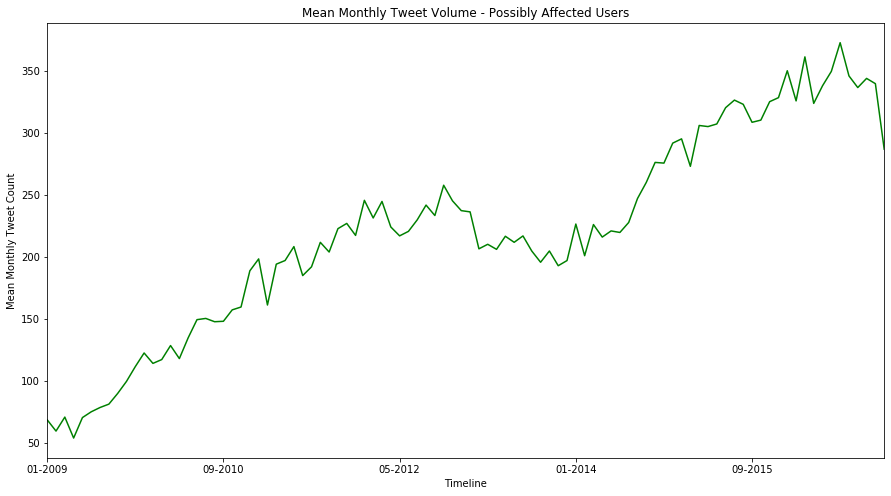

In [25]:
plt.figure()
tweet_countDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Mean Monthly Tweet Volume - Possibly Affected Users')
# plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Tweet Count')
plt.xlabel('Timeline')
# plt.savefig('PAU_graphics/pau_tweetcount.png')
plt.show()

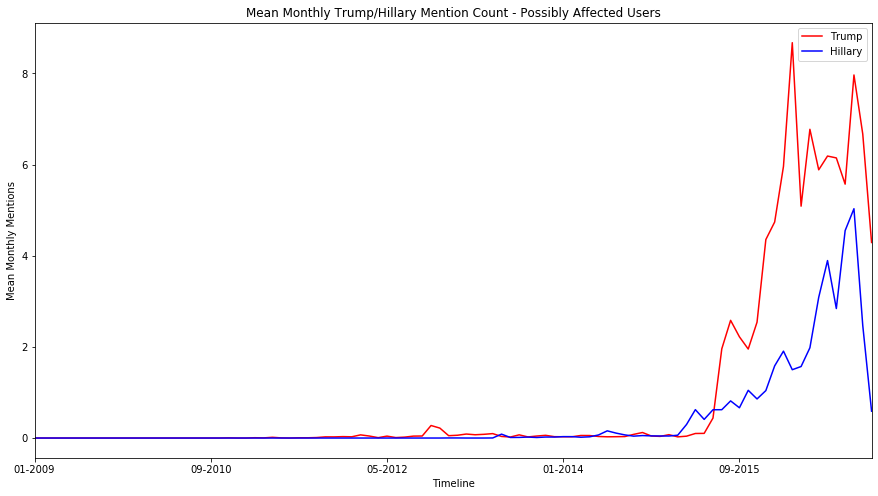

In [26]:
plt.figure()
trump_countDF.mean().plot(kind='line', color='red', figsize=(15,8),title='Mean Monthly Trump/Hillary Mention Count - Possibly Affected Users')
clinton_countDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Mentions')
# plt.savefig('PAU_graphics/pau_mentions.png')
plt.xlabel('Timeline')
plt.show()

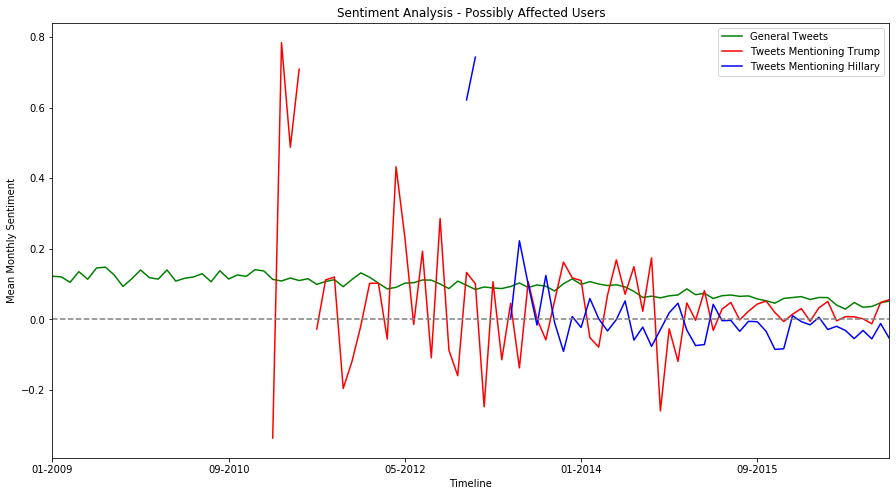

In [27]:
plt.figure()
sentiment_scoresDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Sentiment Analysis - Possibly Affected Users')
trump_sentDF.mean().plot(kind='line', color='red', figsize=(15,8))
clinton_sentDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('General Tweets','Tweets Mentioning Trump','Tweets Mentioning Hillary'))
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel('Mean Monthly Sentiment')
# plt.savefig('PAU_graphics/pau_sentiment.png')
plt.xlabel('Timeline')
plt.show()